In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = df = pd.read_csv("medical_examination.csv")


In [5]:
df["overweight"] = np.where(
    df["weight"] / ((df["height"] / 100) ** 2) > 25, 1, 0
)

In [6]:
df["cholesterol"] = np.where(df["cholesterol"] > 1, 1, 0)
df["gluc"] = np.where(df["gluc"] > 1, 1, 0)

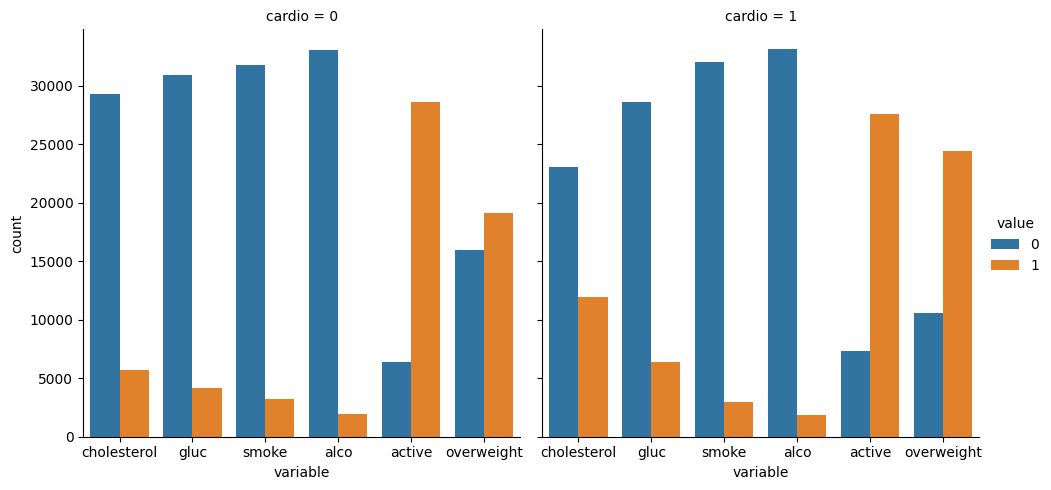

In [10]:
df_long = pd.melt(
    df,
    id_vars=['cardio'],
    value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
)
sns.catplot(
    x='variable',
    hue='value',
    col='cardio',
    data=df_long,
    kind='count'
)
plt.show()

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_14304\851402816.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


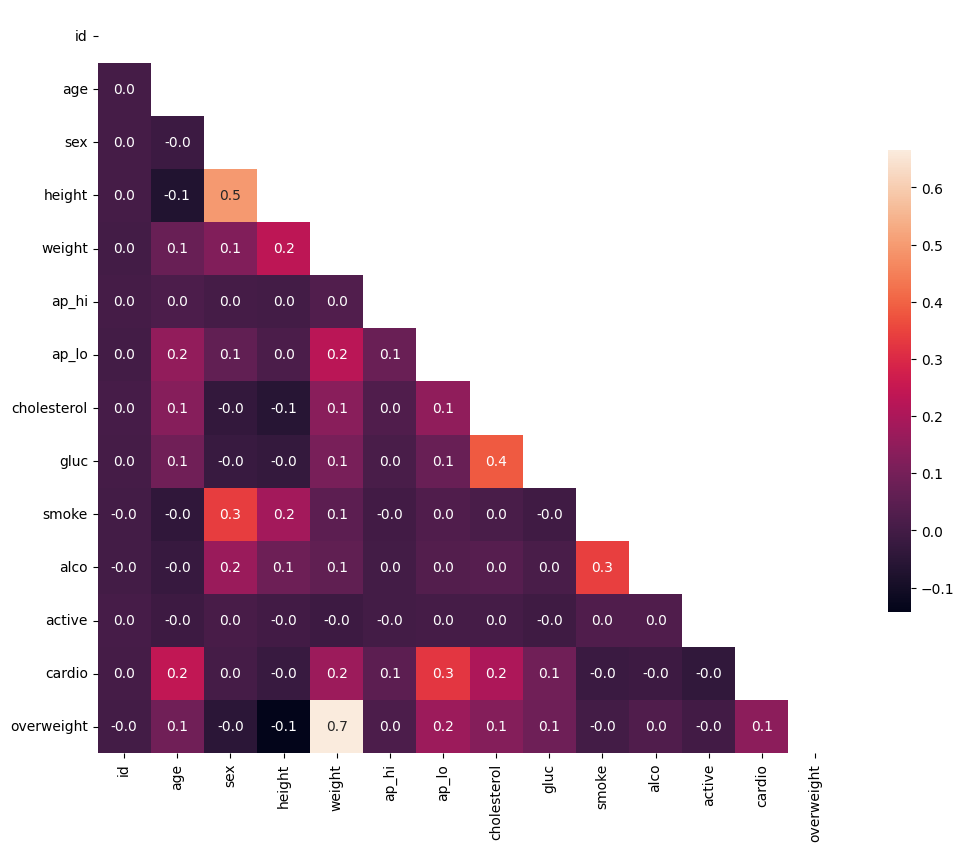

In [11]:
df_heat = df[
    (df["ap_lo"] <= df["ap_hi"])
    & ((df["height"] > df["height"].quantile(0.025)))
    & ((df["height"] < df["height"].quantile(0.975)))
    & ((df["weight"] > df["weight"].quantile(0.025)))
    & ((df["weight"] < df["weight"].quantile(0.975)))
]

# 12
corr = df_heat.corr()

# 13
mask = np.triu(np.ones_like(corr, dtype=bool))

# 14
fig, ax = plt.subplots(figsize=(12, 12))

# 15
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".1f",
    square=True,
    cbar_kws={"shrink": 0.5},
)

# 16
fig.savefig("heatmap.png")
fig.show()